<a href="https://colab.research.google.com/github/manjirigujar/PredictingArrivalDelays/blob/main/Carrier_performance_models_w_oCOVID_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Carrier_Performance

/content/drive/MyDrive/Carrier_Performance


In [ ]:
df1 = pd.read_csv('C5.csv')

In [ ]:
df2 = pd.read_csv('G7.csv')

In [ ]:
df3 = pd.read_csv('HA.csv')

In [ ]:
df4 = pd.read_csv('G4.csv')

In [ ]:
df5 = pd.read_csv('PT.csv')

In [ ]:
df6 = pd.read_csv('QX.csv')

In [ ]:
df7 = pd.read_csv('ZW.csv')

In [ ]:
df8 = pd.read_csv('F9.csv')

In [ ]:
df9 = pd.read_csv('YV.csv')

In [ ]:
df10 = pd.read_csv('NK.csv')

In [ ]:
df11 = pd.read_csv('AS.csv')

In [ ]:
# append multiple DataFrames
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], ignore_index=True)

In [ ]:
#df['Operating_Airline'].unique()

In [ ]:
#df['Year'].unique()

## **Exploratory Data Analysis and Data Pre-Processing**




In [ ]:
indexNames = df[(df['Cancelled'] == 1) | (df['Diverted'] == 1)].index
df.drop(indexNames, inplace=True)


In [ ]:
df['Cancelled'].unique()

array([0.])

In [ ]:
# Drop the "Cancelled" and "CancelledCode" columns
columns_to_drop = ["Cancelled", "CancellationCode", "Diverted", "Flights"]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6619791 entries, 0 to 6823516
Data columns (total 37 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Year                             int64  
 1   Month                            int64  
 2   DayofMonth                       int64  
 3   DayOfWeek                        int64  
 4   Operating_Airline                object 
 5   Operating_Airline_Name           object 
 6   Tail_Number                      object 
 7   Flight_Number_Operating_Airline  int64  
 8   Origin                           object 
 9   OriginCityName                   object 
 10  OriginStateName                  object 
 11  Dest                             object 
 12  DestCityName                     object 
 13  DestStateName                    object 
 14  CRSDepTime                       int64  
 15  DepTime                          float64
 16  DepDelayMinutes                  float64
 17  DepDel15

In [ ]:
# Find columns with null values
#null_columns = df.columns[df.isnull().any()].tolist()

#print(null_columns)

In [ ]:
index_drop = df[df['ArrDel15'].isnull()].index

In [ ]:
index_drop

Int64Index([3097291], dtype='int64')

In [ ]:
df.drop(index_drop, inplace = True)

In [ ]:
index_2020 = df[df['Year'] == 2020].index
index_2020

Int64Index([ 139786,  139788,  139790,  139791,  139792,  139794,  139795,
             139796,  139797,  139798,
            ...
            6756066, 6756067, 6756068, 6756069, 6756070, 6756071, 6756072,
            6756073, 6756074, 6756075],
           dtype='int64', length=876901)

In [ ]:
df.drop(index_2020, inplace = True)

In [ ]:
#Checking for duplicate rows in the dataset
#df.duplicated().sum()

In [ ]:
df.fillna(0, inplace = True)

In [ ]:
df['NASDelay'].isna().value_counts()

False    5742889
Name: NASDelay, dtype: int64

In [ ]:
# Create a new column 'NASDelay_dummy' based on your condition
#df['NASDelay_dummy'] = df['NASDelay'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df['Month'].unique()

array([ 1, 10, 11, 12,  2,  3,  4,  5,  6,  7,  8,  9])

In [ ]:
# Mapping of month numbers to month names
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Replace month numbers with month names
df['Month'] = df['Month'].replace(month_mapping)

In [ ]:
df['Month'].unique()

array(['Jan', 'Oct', 'Nov', 'Dec', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep'], dtype=object)

In [ ]:
df['DayOfWeek'].unique()

array([1, 7, 6, 5, 4, 3, 2])

In [ ]:
# Mapping of day of the week numbers to day names
day_mapping = {
    1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu',
    5: 'Fri', 6: 'Sat', 7: 'Sun'
}

# Replace day of the week numbers with day names
df['DayOfWeek'] = df['DayOfWeek'].replace(day_mapping)

In [ ]:
#Separating the numerical and categorical variables
numerical_variables = df.select_dtypes(include = ['int64' , 'float64'])
categorical_variables = df.select_dtypes(include = 'object')

In [ ]:
corr_mat = numerical_variables.corr()

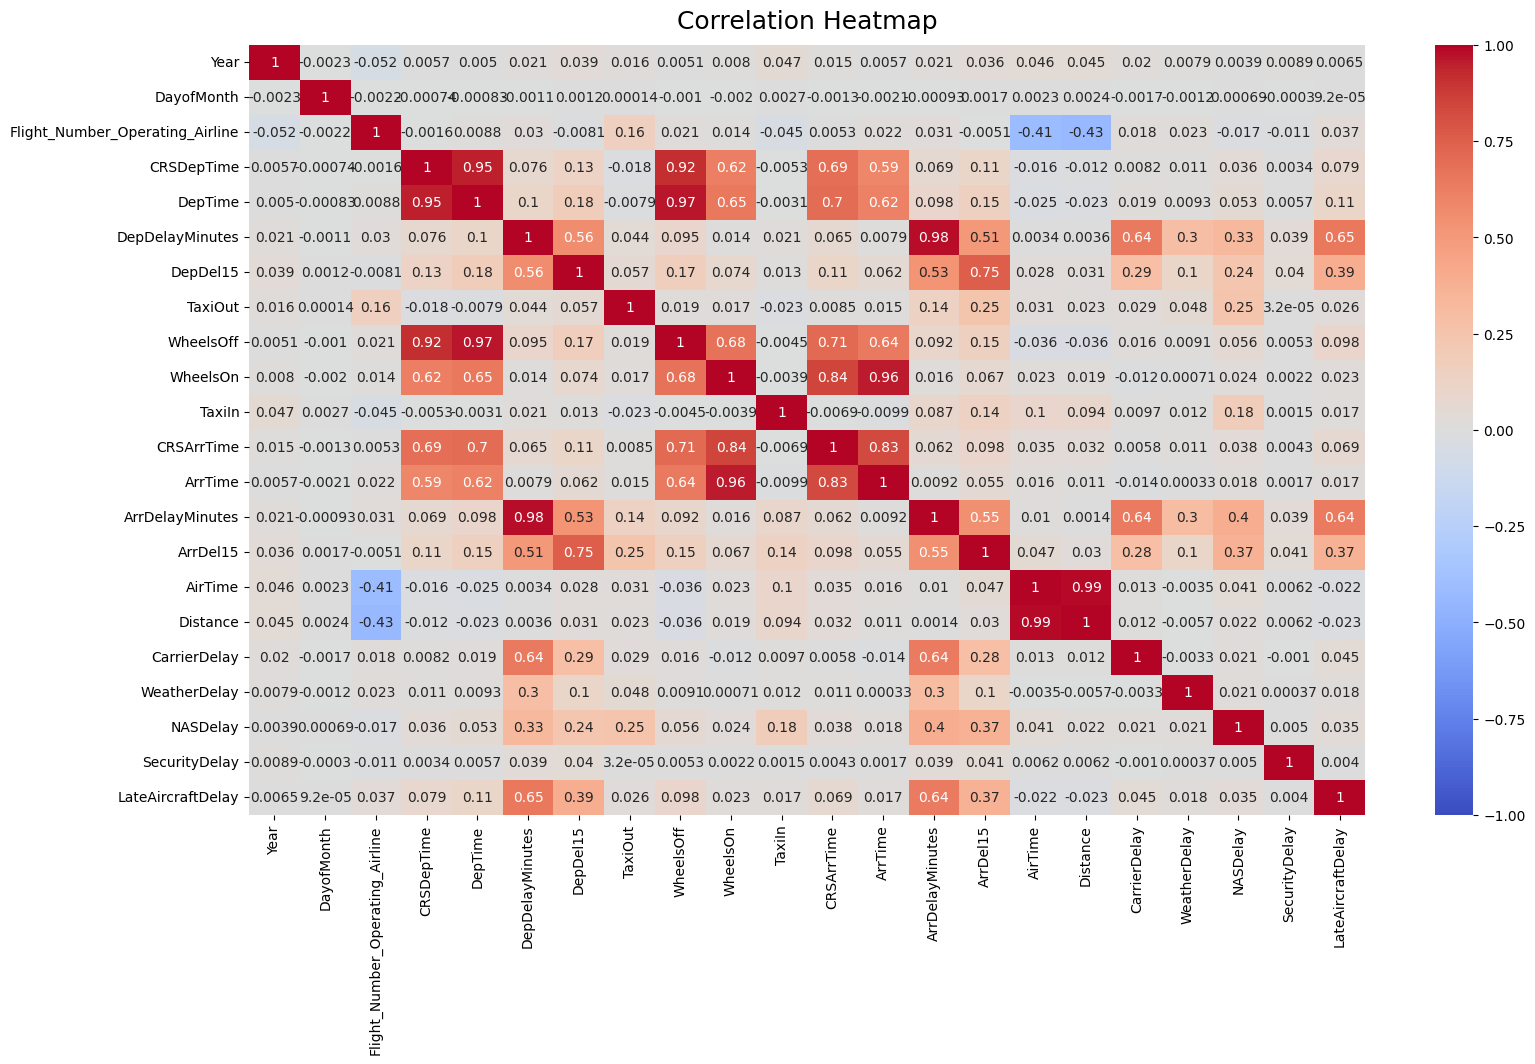

In [ ]:
# Set the color map to show both positive and negative correlations
fig = plt.figure(figsize=(18, 10))
heatmap = sns.heatmap(corr_mat, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()


In [ ]:
categorical_variables.head()

,Month,DayOfWeek,Operating_Airline,Operating_Airline_Name,Tail_Number,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTimeBlk,ArrTimeBlk,Distance_Group_Discription,Holiday
0,Jan,Mon,C5,CommuteAir LLC dba CommuteAir,N33182,IAH,"Houston, TX",Texas,GPT,"Gulfport/Biloxi, MS",Mississippi,1100-1159,1300-1359,250-499 Miles,No Holiday
1,Jan,Mon,C5,CommuteAir LLC dba CommuteAir,N14203,BTR,"Baton Rouge, LA",Louisiana,IAH,"Houston, TX",Texas,0700-0759,0800-0859,250-499 Miles,No Holiday
2,Jan,Mon,C5,CommuteAir LLC dba CommuteAir,N12167,IAH,"Houston, TX",Texas,LBB,"Lubbock, TX",Texas,1800-1859,1900-1959,250-499 Miles,No Holiday
3,Jan,Mon,C5,CommuteAir LLC dba CommuteAir,N12195,IAH,"Houston, TX",Texas,LIT,"Little Rock, AR",Arkansas,1000-1059,1200-1259,250-499 Miles,No Holiday
4,Jan,Mon,C5,CommuteAir LLC dba CommuteAir,N14158,LRD,"Laredo, TX",Texas,IAH,"Houston, TX",Texas,1400-1459,1500-1559,250-499 Miles,No Holiday


In [ ]:
#checking the standard deviation of numerical variables
numerical_variables.std()

Year                                  1.707832
DayofMonth                            8.775203
Flight_Number_Operating_Airline    2180.502583
CRSDepTime                          489.922488
DepTime                             504.064535
DepDelayMinutes                      49.950654
DepDel15                              0.393170
TaxiOut                               9.356497
WheelsOff                           505.413642
WheelsOn                            531.678392
TaxiIn                                6.754330
CRSArrTime                          514.156062
ArrTime                             537.306859
ArrDelayMinutes                      49.929445
ArrDel15                              0.406765
AirTime                              75.679916
Distance                            637.392776
CarrierDelay                         30.426716
WeatherDelay                         14.372953
NASDelay                             18.047495
SecurityDelay                         1.780668
LateAircraftD

In [ ]:
#finding the number of unique values in all variables
for column in categorical_variables.columns:
    print(column,categorical_variables[column].nunique())

Month 12
DayOfWeek 7
Operating_Airline 11
Operating_Airline_Name 11
Tail_Number 1487
Origin 298
OriginCityName 292
OriginStateName 53
Dest 299
DestCityName 293
DestStateName 53
DepTimeBlk 19
ArrTimeBlk 19
Distance_Group_Discription 11
Holiday 13


In [ ]:
#dropping columns from the model to reduce multi-collinearity
columns_to_drop = ["Year", "DayofMonth", "Operating_Airline", "Flight_Number_Operating_Airline", "DepTimeBlk", "ArrTimeBlk", "CRSArrTime", "ArrTime", "Distance_Group_Discription", "ArrDelayMinutes", "AirTime", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]
df.drop(columns=columns_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5742889 entries, 0 to 6823516
Data columns (total 21 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Month                   object 
 1   DayOfWeek               object 
 2   Operating_Airline_Name  object 
 3   Tail_Number             object 
 4   Origin                  object 
 5   OriginCityName          object 
 6   OriginStateName         object 
 7   Dest                    object 
 8   DestCityName            object 
 9   DestStateName           object 
 10  CRSDepTime              int64  
 11  DepTime                 float64
 12  DepDelayMinutes         float64
 13  DepDel15                float64
 14  TaxiOut                 float64
 15  WheelsOff               float64
 16  WheelsOn                float64
 17  TaxiIn                  float64
 18  ArrDel15                float64
 19  Distance                float64
 20  Holiday                 object 
dtypes: float64(9), int64(1), object

In [ ]:
#df['CRSDepTime'] = np.ceil(df['CRSDepTime']/600).apply(int)
#df['CRSArrTime'] = np.ceil(df['CRSDepTime']/600).apply(int)
#df['ArrTime'] = np.ceil(df['ArrTime']/600).apply(int)
#df['DepTime'] = np.ceil(df['DepTime']/600).apply(int)
#df['WheelsOff'] = np.ceil(df['WheelsOff']/600).apply(int)
#df['WheelsOn'] = np.ceil(df['WheelsOn']/600).apply(int)

#df.CRSDepTime.value_counts(normalize=True)
#df.CRSArrTime.value_counts(normalize=True)
#df.ArrTime.value_counts(normalize=True)
#df.DepTime.value_counts(normalize=True)

#df.WheelsOff.value_counts(normalize=True)
#df.WheelsOn.value_counts(normalize=True)


In [ ]:
# Convert float to string and then HHMM format to integer representation
def convert_to_minutes(time_float):
    try:
        time_str = str(int(time_float)).zfill(4)  # Convert to string and zero-pad
        hours = int(time_str[:2])
        minutes = int(time_str[2:])
        return hours * 60 + minutes
    except:
        return None  # Handle any exceptions during conversion

In [ ]:
# Convert HHMM format to integer representation
#df['CRSArrTime'] = df['CRSArrTime'].apply(convert_to_minutes)
#df['ArrTime'] = df['ArrTime'].apply(convert_to_minutes)
df['CRSDepTime'] = df['CRSDepTime'].apply(convert_to_minutes)
df['DepTime'] = df['DepTime'].apply(convert_to_minutes)
df['WheelsOff'] = df['WheelsOff'].apply(convert_to_minutes)
df['WheelsOn'] = df['WheelsOn'].apply(convert_to_minutes)

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
# Label encoding features to change categorical variables into numerical one
#df['Operating_Airline_Name'] = le.fit_transform(df['Operating_Airline_Name'])
#df['Origin'] = le.fit_transform(df['Origin'])
#df['OriginCityName'] = le.fit_transform(df['OriginCityName'])
#df['Dest'] = le.fit_transform(df['Dest'])
#df['DestCityName'] = le.fit_transform(df['DestCityName'])
#df['DestStateName'] = le.fit_transform(df['DestStateName'])
#df['Holiday'] = le.fit_transform(df['Holiday'])
#df['OriginStateName'] = le.fit_transform(df['OriginStateName'])

In [ ]:
#creating a variable and assigning the target column
y = df['ArrDel15']

In [ ]:
#creating a new variable and assigning the rest of the dataframe without the target column
X = df.drop("ArrDel15", axis = 1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5742889 entries, 0 to 6823516
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Month                   object 
 1   DayOfWeek               object 
 2   Operating_Airline_Name  object 
 3   Tail_Number             object 
 4   Origin                  object 
 5   OriginCityName          object 
 6   OriginStateName         object 
 7   Dest                    object 
 8   DestCityName            object 
 9   DestStateName           object 
 10  CRSDepTime              int64  
 11  DepTime                 int64  
 12  DepDelayMinutes         float64
 13  DepDel15                float64
 14  TaxiOut                 float64
 15  WheelsOff               int64  
 16  WheelsOn                int64  
 17  TaxiIn                  float64
 18  Distance                float64
 19  Holiday                 object 
dtypes: float64(5), int64(4), object(11)
memory usage: 920.1+ MB


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
#from sklearn.tree import DecisionTreeClassifier
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 64)

In [ ]:
# Calculate class frequencies
class_freq = np.bincount(y_train)
print("Class frequencies:", class_freq)

Class frequencies: [3179693  840329]


In [ ]:
# Calculate class weights
class_weights = len(y_train) / (2 * class_freq)
class_weights = dict(zip([0, 1], class_weights))
print("Class weights:", class_weights)

Class weights: {0: 0.6321399581657726, 1: 2.3919333975145447}


In [ ]:
#tree_clf = DecisionTreeClassifier(criterion='gini', max_depth= 5, class_weight=class_weights)
#tree_clf.fit(X_train, y_train)

In [ ]:
#y_pred_dt = tree_clf.predict(X_test)

In [ ]:
#pred_acc = accuracy_score(y_test, y_pred_dt)

In [ ]:
#pred_acc

In [ ]:
#conf_matrix = confusion_matrix(y_test, y_pred_dt)
#conf_matrix

In [ ]:
def plot_confusion_matrix(conf_matrix, labels):
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    #plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = 'd'
    thresh = conf_matrix.max() / 2.
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, format(conf_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if conf_matrix[i, j] > thresh else "darkblue")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Define your class labels
class_labels = ['On-Time', 'Delayed']  # Replace with your actual class labels




In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 10))
    plt.barh(range(n_features), model.feature_importances_, color='darkblue', align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.grid(True)



#plot_feature_importances(tree_clf)
#plt.rcParams["figure.facecolor"] = "lightblue"



In [ ]:
# instantiating the RandomForestClassifier
#forest = RandomForestClassifier()
#forest.fit(X_train, y_train)

#check the accuracy score
#forest.score(X_train, y_train)



In [ ]:
#y_pred_rf = forest.predict(X_test)

In [ ]:
#conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
#conf_mat_rf

In [ ]:
# Plot the confusion matrix
#plot_confusion_matrix(conf_mat_rf, class_labels)
#plt.show()

In [ ]:
#plot_feature_importances(forest)
#plt.rcParams["figure.facecolor"] = "lightblue"

In [ ]:
cat_variables = list(df.select_dtypes(include=['object']).columns)

In [ ]:
cat_model = CatBoostClassifier(iterations=100, cat_features=cat_variables, class_weights=class_weights, max_depth = 5, verbose=False)

In [ ]:
cat_model.fit(X_train, y_train)

In [ ]:
y_pred_cat = cat_model.predict(X_test)

In [ ]:
acc_cat = accuracy_score(y_test, y_pred_cat)
acc_cat

0.9335984727782237

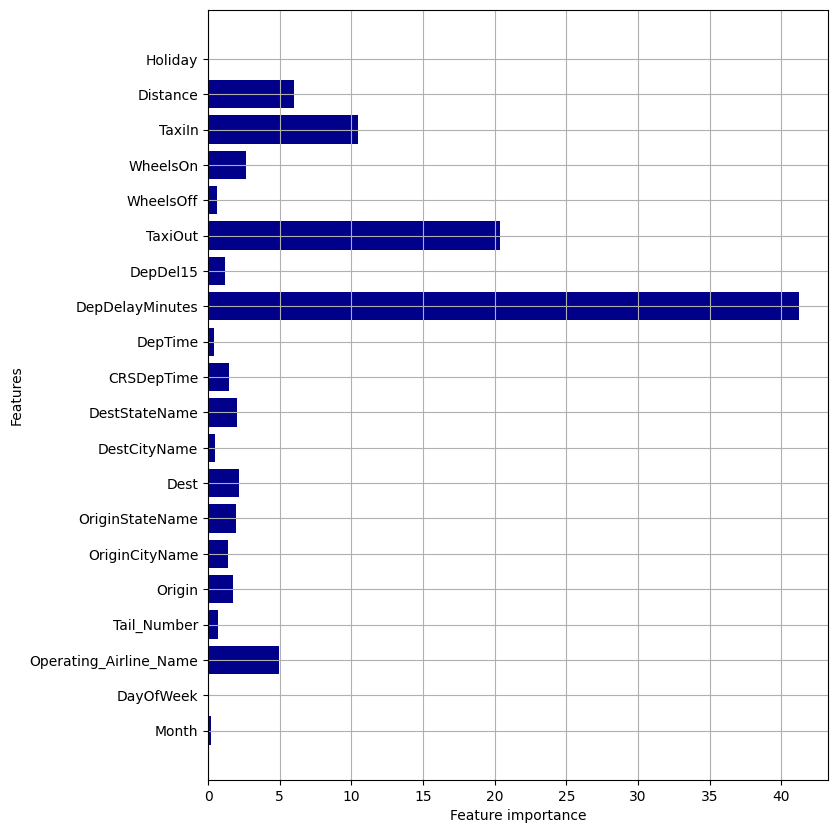

In [ ]:
plot_feature_importances(cat_model)

In [ ]:
conf_mat_cat = confusion_matrix(y_test, y_pred_cat)
conf_mat_cat

array([[1277686,   83877],
       [  30524,  330780]])

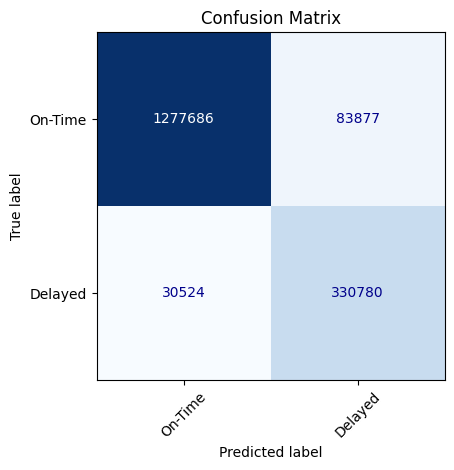

In [ ]:
# Plot the confusion matrix
plot_confusion_matrix(conf_mat_cat, class_labels)
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_cat)


In [ ]:
report

'              precision    recall  f1-score   support\n\n         0.0       0.98      0.94      0.96   1361563\n         1.0       0.80      0.92      0.85    361304\n\n    accuracy                           0.93   1722867\n   macro avg       0.89      0.93      0.90   1722867\nweighted avg       0.94      0.93      0.94   1722867\n'

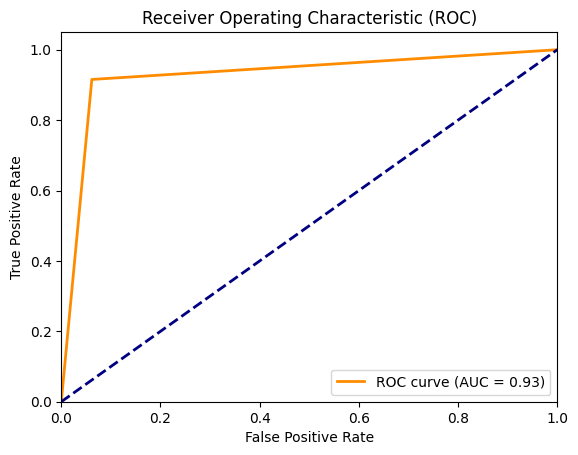

AUC: 0.9269568304174987


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cat)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print("AUC:", roc_auc)